# Implementing polynomial regression of degrees 2, 3 and 4

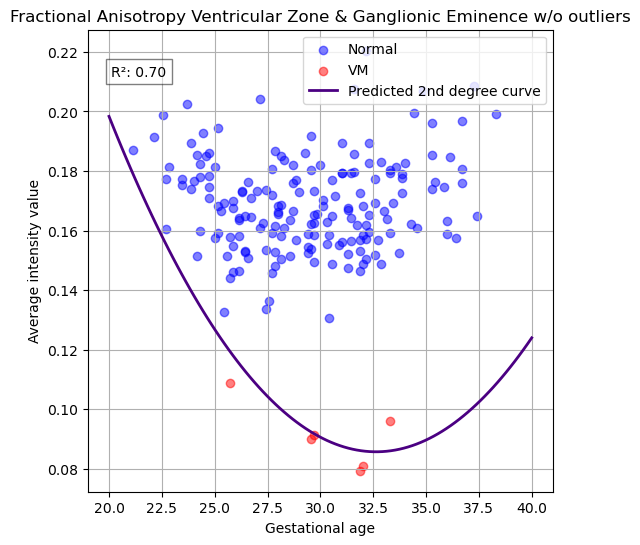

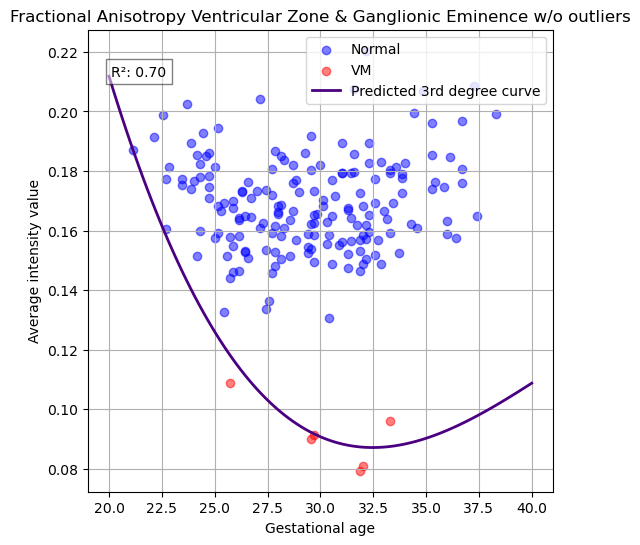

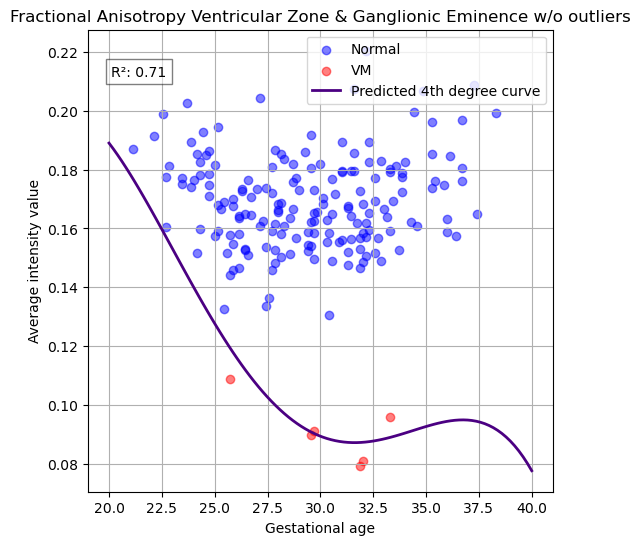

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set current working directory
os.chdir('C:/Users/amu_k/subjects-mri-dwi/pre-processing-files/extracted-lab-regions')

# Load Excel file
excel = pd.ExcelFile('average_values.xlsx')

# Define outlier indices
outliers = [7, 89, 135, 146, 173]

# Define VM subjects
VM_subjects = [3, 8, 53, 54, 137, 166]
normal_subjects = df[~df.index.isin(VM_subjects)]

# Define polynomial degrees
degrees = [2, 3, 4]

# Dictionary for polynomial suffixes
suffixes = {2: 'nd', 3: 'rd', 4: 'th'}

# Iterate over polynomial degrees
for degree in degrees:
    # Load DataFrame
    df = excel.parse('fa-PVWM')
    
    # Exclude outliers
    df = df[~df.index.isin(outliers)]
    
    # Define features and target
    X = np.array(df['ga']).reshape(-1, 1)
    y = np.array(df['average'])

    # Add polynomial feature
    pr = PolynomialFeatures(degree=degree)
    X_poly = pr.fit_transform(X)

    # Scale features
    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)

    # Fit the model
    lr = LinearRegression()
    lr.fit(X_poly, y)
    
    # Predict results
    df['predicted'] = lr.predict(X_poly)
    
    # Compute r^2 score
    r2 = r2_score(y, df['predicted'])
    
    # Plot data and regression curve
    polyline = np.linspace(20, 40, 100).reshape(-1, 1)
    polyline_transformed = pr.transform(polyline)
    predicted_values = lr.predict(scaler.transform(polyline_transformed))

    plt.figure(figsize=(6, 6))
    plt.scatter(normal_subjects['ga'], normal_subjects['average'], label='Normal', color='blue', marker='o', alpha=0.5)
    plt.scatter(df['ga'].iloc[VM_subjects], df['average'].iloc[VM_subjects], label='VM', color='red', marker='o', alpha=0.5)
    plt.plot(polyline, predicted_values, color='indigo', label=f'Predicted {degree}{suffixes.get(degree, "th")} degree curve', linewidth=2)
    plt.text(0.05, 0.9, f"R²: {r2:.2f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.title('Fractional Anisotropy Ventricular Zone & Ganglionic Eminence w/o outliers')
    plt.xlabel('Gestational age')
    plt.ylabel('Average intensity value')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()